<h1>Analytics in aviacompany<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Tale-and-tasks" data-toc-modified-id="Tale-and-tasks-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Tale and tasks</a></span></li><li><span><a href="#Importing-libraries" data-toc-modified-id="Importing-libraries-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Importing libraries</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>EDA</a></span></li><li><span><a href="#Studying-graphs" data-toc-modified-id="Studying-graphs-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Studying graphs</a></span><ul class="toc-item"><li><span><a href="#Aircraft-models-and-number-of-flights" data-toc-modified-id="Aircraft-models-and-number-of-flights-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Aircraft models and number of flights</a></span></li><li><span><a href="#Cities-of-arrival-and-average-number-of-flights-per-day" data-toc-modified-id="Cities-of-arrival-and-average-number-of-flights-per-day-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Cities of arrival and average number of flights per day</a></span></li><li><span><a href="#Top-10-most-popular-cities-of-arrival-and-number-of-flights" data-toc-modified-id="Top-10-most-popular-cities-of-arrival-and-number-of-flights-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Top-10 most popular cities of arrival and number of flights</a></span></li></ul></li><li><span><a href="#Total-conclusions" data-toc-modified-id="Total-conclusions-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Total conclusions</a></span></li></ul></div>

## Tale and tasks

«F9» is a Russian airline performing domestic passenger air transportation, hundreds of flights every day. 

There're presented two datasets:

* One dataset contains information about:
    - model - models of aircrafts;
    - flights_amount - the number of flights for each model of aircrafts in September 2018;

* Another dataset contains information about:
    - city - cities of arrival;
    - average_flights - average number of flights per day arriving in the city in August 2018. It is known from a description that when calculating the average, all the obtained values less than one were rounded up to the nearest one.

Tasks:

It is necessary to study datasets, to build graphs showing relationship between aircraft models and the number of flights, cities of arrival and the number of flights, between the most popular cities of arrival (top-10) and the number of flights; to draw conclusions for each of the graphs, explain results.

##  Importing libraries

In [1]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import plotly.io as pio
pio.renderers.default='notebook'
import plotly.express as px
import seaborn as sns
sns.set()

## EDA

In [2]:
# download dataset with aircraft models and flights
m_f = pd.read_csv('airline_query_1.csv')
m_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           8 non-null      object
 1   flights_amount  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [3]:
m_f

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [4]:
# download dataset with cities of arrival and flights
c_f = pd.read_csv('airline_query_3.csv')
c_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [5]:
c_f.sample(5)

,city,average_flights
41,Минеральные Воды,3.419355
69,Самара,3.000000
57,Ноябрьск,3.000000
54,Новосибирск,17.322581
9,Братск,1.000000


In [6]:
c_f['city'].str.lower().duplicated().sum()

0

There're received two datasets with info on a Russian airline "F9". 

One dataset contains information about 8 models of aircrafts used by the airline and  the number of flights, performed by aircrafts of each model in September 2018. There are no gaps or duplicates revealed, the data types are adequate to the information presented.

Another dataset contains information about 101 cities of flights' arrival and average number of flights per day arriving in  each city in August 2018. Names of cities're provided in Russian in Cyrillic. After changing register of cities' names to the lower register there're no gaps or duplicates revealed. The data type for the average number of flights per day (`average_flights`) is `float64`, a real number, is used lawfully, it may not be an integer, we may leave it as it is. It is known from a descriprion of data that when calculating the avearage, all the obtained values less than one were rounded to the nearest one.

## Studying graphs

### Aircraft models and number of flights

In [14]:
fig = px.bar(
    m_f.sort_values(by = 'flights_amount', ascending = False),
    x = 'model',
    y = 'flights_amount',
    text = 'flights_amount',
    title = 'Number of flights, performed by aircrafts of each model in September 2018',
    labels = {'model': 'Model of aircraft', 'flights_amount': 'Number of flights'}
)
fig.update_xaxes(tickangle=-30)
fig.show()

The most used models of aircrafts by "F9" in September 2018 were the "Cessna 208 Caravan" (leader of the group, 4,557 flights), "Bombardier CRJ-200" and "Sukhoi SuperJet-100". Aircrafts of these three models, each performed more than 4k flights in that month. The rest models, represented by the "Airbus" and "Boeing" brands, were used several times less often, on average, about 620 flights per model per month. The minimum number of flights in the group was performed by aircrafts of "Boeing 777-300" model  - only 300 flights.

###  Cities of arrival and average number of flights per day

In [8]:
c_f = c_f.sort_values(by = 'average_flights', ascending = False).round()
display(c_f)

,city,average_flights
43,Москва,130.0
70,Санкт-Петербург,31.0
54,Новосибирск,17.0
33,Красноярск,12.0
20,Екатеринбург,11.0
...,...,...
22,Ижевск,1.0
65,Петропавловск-Камчатский,1.0
31,Комсомольск-на-Амуре,1.0
58,Нягань,1.0


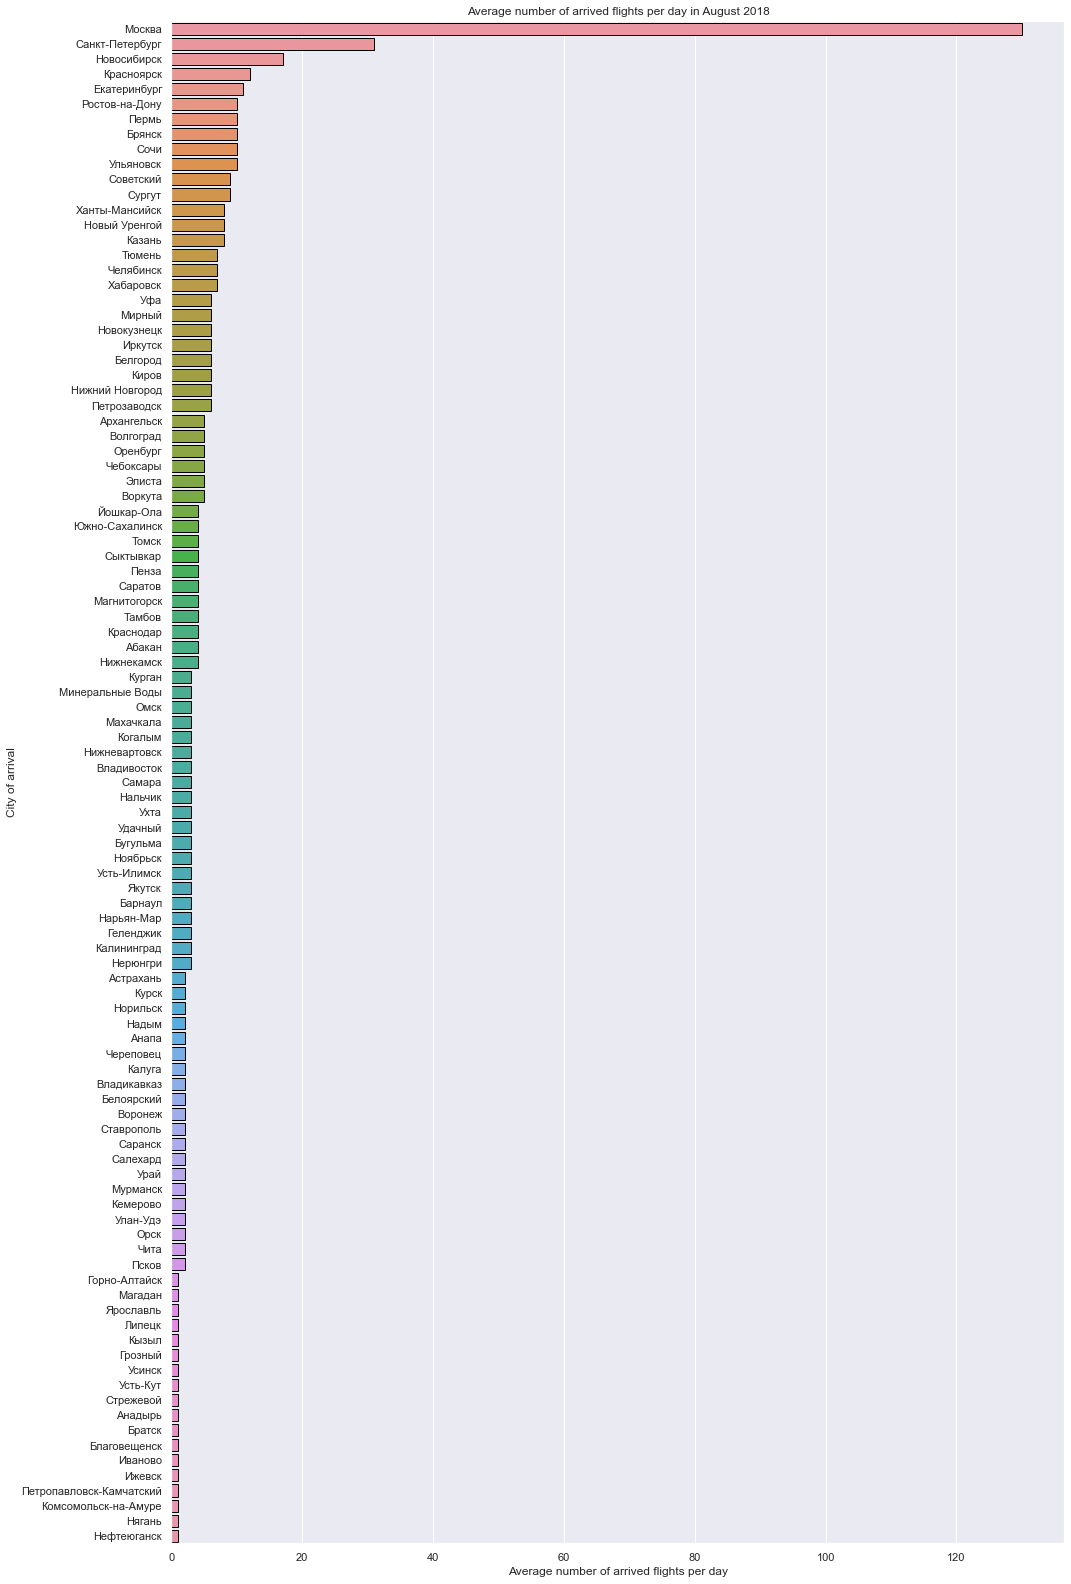

In [9]:
plt.figure(figsize=(16,28))
sns.barplot(data = c_f, x='average_flights', \
            y='city', edgecolor="black", orient='h')
plt.title("Average number of arrived flights per day in August 2018")
plt.xlabel("Average number of arrived flights per day")
plt.ylabel("City of arrival")
plt.show()

In [10]:
# mediane of arrived flights per day
c_f.median()

average_flights    3.0
dtype: float64

Moscow was the absolute leader in terms of the average number of arrivals per day (almost 130 arriving flights per day), St. Petersburg was in second place (31 flights), and Novosibirsk was in third place (17 flights). 

The ten most popular destinations among "F9" passengers in August 2018 also included Krasnoyarsk, Yekaterinburg, Rostov-on-Don, Perm, Bryansk, Sochi, Ulyanovsk. 

12 cities: Nefteyugansk, Nyagan, Komsomolsk-on-Amur, Petropavlovsk-Kamchatsky, Izhevsk, Ivanovo, Blagoveshchensk, Bratsk, Anadyr, Strezhevoy, Ust-Kut, Usinsk - took a maximum of 1 flight per day, and not every day. 

The median of these data (incl. high Moscow emission) is 3 arriving flights per day.

### Top-10 most popular cities of arrival and number of flights

To make a slice of the top 10 popular arrival cities, find out the average number of arrivals for the 10th city of sorted sample - Ulyanovsk, and then build a graph only for cities with not less average number:

In [11]:
c_f[c_f['city'] == 'Ульяновск']

,city,average_flights
84,Ульяновск,10.0


In [12]:
top_10 = c_f[c_f['average_flights'] >= 9.580645]
fig = px.bar(
    top_10.sort_values(by = 'average_flights', ascending = False),
    x = 'city',
    y = 'average_flights',
    text = 'average_flights',
    title = 'Average number of arrivals per city per day in September 2018',
    labels = {'city': 'City of arrival', 'average_flights': 'Number of arrivals per day'}
)
fig.update_xaxes(tickangle=-30)
fig.show()

Among the top-10 cities in terms of number of arrivals, seven cities - Krasnoyarsk, Yekaterinburg, Rostov-on-Don, Perm, Bryansk, Sochi, Ulyanovsk - accept on average of 9-11 flights per day. Novosibirsk - one and a half times more than others - 17 arrivals per day. St. Petersburg - three times more than others - 31 arrivals per day. And Moscow with its several airports and high business and tourist activity - 13 times more than others - 130 arriving flights per day on average.

## Total conclusions

There're received two datasets with info on a Russian airline "F9".

One dataset contains information about 8 models of aircrafts used by the airline and the number of flights, performed by aircrafts of each model in September 2018. There are no gaps or duplicates revealed, the data types are adequate to the information presented.

Another dataset contains information about 101 cities of flights' arrival and average number of flights per day arriving in each city in August 2018. Names of cities're provided in Russian in Cyrillic. After changing register of cities' names to the lower register there're no gaps or duplicates revealed. The data type for the average number of flights per day (`average_flights`) is `float64`, a real number, is used lawfully. It is known from a description of data that when calculating the avearage, all the obtained values less than one were rounded to the nearest one.

The most used models of aircrafts by "F9" in September 2018 were the "Cessna 208 Caravan" (leader of the group, 4,557 flights), "Bombardier CRJ-200" and "Sukhoi SuperJet-100". Aircrafts of these three models, each performed more than 4k flights in that month. The rest models, represented by the "Airbus" and "Boeing" brands, were used several times less often, on average, about 620 flights per model per month. The minimum number of flights in the group was performed by aircrafts of "Boeing 777-300" model - only 300 flights.

Moscow was the absolute leader in terms of the average number of arrivals per day (almost 130 arriving flights per day), St. Petersburg was in second place (31 flights), and Novosibirsk was in third place (17 flights). 

The ten most popular destinations among "F9" passengers in August 2018 also included Krasnoyarsk, Yekaterinburg, Rostov-on-Don, Perm, Bryansk, Sochi, Ulyanovsk. 

12 cities: Nefteyugansk, Nyagan, Komsomolsk-on-Amur, Petropavlovsk-Kamchatsky, Izhevsk, Ivanovo, Blagoveshchensk, Bratsk, Anadyr, Strezhevoy, Ust-Kut, Usinsk - took a maximum of 1 flight per day, and not every day. 

The median of these data (incl. high Moscow emission) is 3 arriving flights per day.

Among the top-10 cities in terms of average number of arrivals, seven cities - Krasnoyarsk, Yekaterinburg, Rostov-on-Don, Perm, Bryansk, Sochi, Ulyanovsk - accepted on average of 9-11 flights per day. Novosibirsk - one and a half times more than others - 17 arrivals per day. St. Petersburg - three times more than others - 31 arrivals per day. And Russian capital Moscow with its several airports and high business and tourist activity - 13 times more than others - 130 arriving flights per day on average.